## **Importing Libraries**





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
df = pd.read_csv("/content/4.2 - Religion_Ethnicity Dataset - FINAL.csv")

In [ ]:
df.head()

,TEXT,LABEL
0,"In other words #katandandre, your food was cra...",NOT
1,Why is #aussietv so white? #MKR #theblock #ImA...,NOT
2,@XochitlSuckkks a classy whore? Or more red ve...,NOT
3,"@Jason_Gio meh. :P thanks for the heads up, bu...",NOT
4,@RudhoeEnglish This is an ISIS account pretend...,NOT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23904 entries, 0 to 23903
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TEXT    23904 non-null  object
 1   LABEL   23904 non-null  object
dtypes: object(2)
memory usage: 373.6+ KB


In [ ]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import demoji
import string

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Data Preprocessing**

```
*   removing Hashtag, Mention, URLs
*   text lowercase
*   stemming
*   lemmatizing
*   removing Punctuations
*   removing stopwords
*   sub of emojis
```














In [ ]:
stopwords.words('english')
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will', 'wa', 'e', 'like'])

stemmer = SnowballStemmer('english')
lemmatizer=WordNetLemmatizer()


def clean_text(text):
    
    #removing Hashtag, Mention, URLs
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())
    
    #make all text lowercase
    text = text.lower() 

    #lemmatizing
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

    #stemming
    #text = " ".join([stemmer.stem(word) for word in text.split()])
    
    #removing Punctuations
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    text = remove_punc.sub('', text)
    
    #removing stopwords
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])
    
    # sub of emojis
    emoji = demoji.findall(text)
    for emot in emoji:
        text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), text)

    return text

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df['cleaned_text'] = df['TEXT'].apply(lambda text: clean_text(text))

In [ ]:
df.head(30)

,TEXT,LABEL,cleaned_text
0,"In other words #katandandre, your food was cra...",NOT,word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,NOT,white
2,@XochitlSuckkks a classy whore? Or more red ve...,NOT,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, bu...",NOT,gio meh thanks head concerned another angry du...
4,@RudhoeEnglish This is an ISIS account pretend...,NOT,isi account pretending kurdish account islam lies
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",NOT,yes test god good bad indifferent weird whatev...
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,NOT,itu sekolah ya bukan tempat bully ga jauh kaya...
7,Karma. I hope it bites Kat on the butt. She is...,NOT,karma hope bite butt nasty
8,@stockputout everything but mostly my priest,NOT,everything mostly priest
9,Rebecca Black Drops Out of School Due to Bully...,NOT,rebecca black drop school due bullying


# **Preprocessed Information**

In [ ]:
df.isnull()

,TEXT,LABEL,cleaned_text
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
23899,False,False,False
23900,False,False,False
23901,False,False,False
23902,False,False,False


In [ ]:
df.isnull().sum() 

TEXT            0
LABEL           0
cleaned_text    0
dtype: int64

In [ ]:
df['cleaned_text'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23899    False
23900    False
23901    False
23902    False
23903    False
Name: cleaned_text, Length: 23904, dtype: bool

In [ ]:
df['cleaned_text'].duplicated().sum()

490

In [ ]:
df.drop_duplicates("cleaned_text", inplace = True)
df['cleaned_text'].sum()

'word food crapiliciouswhiteclassy whore red velvet cupcakesgio meh thanks head concerned another angry dude twitterisi account pretending kurdish account islam liesyes test god good bad indifferent weird whatever prof god existenceitu sekolah ya bukan tempat bully ga jauh kaya nerakakarma hope bite butt nastyeverything mostly priestrebecca black drop school due bullyingisdeadbully flush kdughhhhkurdsnews turkish state ha killed 241 child last 11 year ã‡eviricitopluluäÿukã¼rtã§eyideeâ€¦love best response hotcake managed film noncommittal meh adolescentparem fazer bullying comigo uhahuah bando pretomaggi tadinhu mim sofrendo bulling viu mimitwitter basically angry letter generationbest pick line hi youre cute love people call james potter bully mypatronusisyougotta walk classss officially hate stupid bus systemknow saudi chased girl burning buildingkid loveðÿ˜˜â\x9d¤ mohamad bin zayed city ù…ø¯ùšù†øcopyright ù…ø\xadù…ø¯ ø¨ù† ø²ø§ùšø¯still jack amsterdam ciroc crown bud light limearita c

In [ ]:
df['LABEL'].value_counts()

religion     7947
ethnicity    7792
NOT          7675
Name: LABEL, dtype: int64

In [ ]:
print('Total Data after removing duplicate data: ')
df['LABEL'].value_counts().sum()

Total Data after removing duplicate data: 


23414

# **Data Visualization**

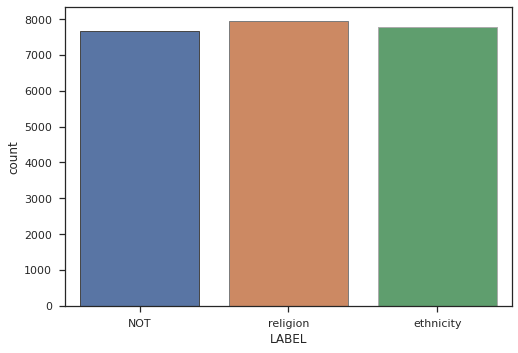

In [ ]:
sns.set_theme(style="ticks")
sns.countplot(data = df, x = 'LABEL', edgecolor=sns.color_palette("RdGy_r", 10))

In [ ]:
# top 50 words for NOT CLASS

    
top50_word = df.cleaned_text[df.LABEL=='NOT'].str.split(expand=True).stack().value_counts()[:50]
    
fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top50_word.values])
fig.update_traces(marker_color='red')
fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
fig.update_layout(title="Top 50 words for NOT",
                     template='simple_white',
                     hovermode='x unified')
fig.show()

In [ ]:
# top 50 words for RELIGION CLASS

    
top50_word = df.cleaned_text[df.LABEL=='religion'].str.split(expand=True).stack().value_counts()[:50]
    
fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top50_word.values])
fig.update_traces(marker_color='green')
fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
fig.update_layout(title="Top 50 words for RELIGION",
                     template='simple_white',
                     hovermode='x unified')
fig.show()

In [ ]:
# top 50 words for ETHNICITY CLASS

    
top50_word = df.cleaned_text[df.LABEL=='ethnicity'].str.split(expand=True).stack().value_counts()[:50]
    
fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top50_word.values])
fig.update_traces(marker_color='blue')
fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
fig.update_layout(title="Top 50 words for ETHNICITY",
                     template='simple_white',
                     hovermode='x unified')
fig.show()

# **Feature Extraction**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X=df['cleaned_text']
Y=df['LABEL']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.8, random_state = 42)






#   **TF-IDF**









In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)

In [ ]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
X_train_tfidf

<4682x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 50818 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf

<18732x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 189483 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tfidf_array_train = X_train_tfidf.toarray()   # Converting the sparse matrix to a numpy array (dense matrix)
tfidf_array_test = X_test_tfidf.toarray()     # Converting the sparse matrix to a numpy array (dense matrix)
scaled_X_train = scaler.fit_transform(tfidf_array_train)  # Fitting on only training data to avoid data leakage from test data
scaled_X_test = scaler.transform(tfidf_array_test) # and then tranforming both training and testing data

# Model Training

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



              precision    recall  f1-score   support

         NOT       0.91      0.92      0.91      6147
   ethnicity       0.97      0.97      0.97      6185
    religion       0.94      0.93      0.93      6400

    accuracy                           0.94     18732
   macro avg       0.94      0.94      0.94     18732
weighted avg       0.94      0.94      0.94     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



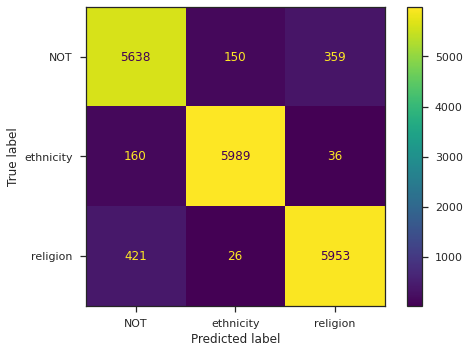

In [ ]:
# LOGISTIC REGRESSION
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
log_model = LogisticRegression(solver = 'saga')
param_grid = {'C': np.logspace(0, 10, 5)}
grid_log_model = HalvingGridSearchCV(log_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_log_model.fit(X_train_tfidf, y_train)
preds_grid_log_model = grid_log_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_log_model))
plot_confusion_matrix(grid_log_model, X_test_tfidf, y_test)

In [ ]:
grid_log_model.best_estimator_

LogisticRegression(C=10000000000.0, solver='saga')

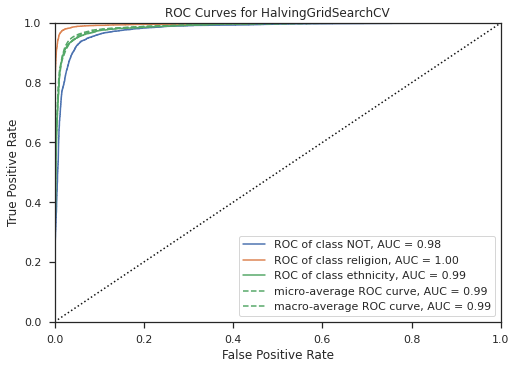

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57a8e43f50>,
       classes=['NOT', 'religion', 'ethnicity'],
       estimator=HalvingGridSearchCV(estimator=LogisticRegression(solver='saga'),
                                     n_jobs=-1,
                                     param_grid={'C': array([1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10])}))

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_log_model, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])

              precision    recall  f1-score   support

         NOT       0.91      0.94      0.92      6147
   ethnicity       0.98      0.97      0.98      6185
    religion       0.95      0.93      0.94      6400

    accuracy                           0.95     18732
   macro avg       0.95      0.95      0.95     18732
weighted avg       0.95      0.95      0.95     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



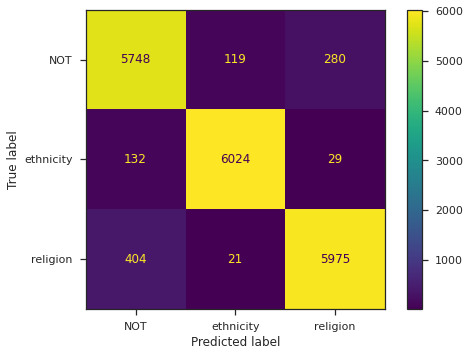

In [ ]:
#SUPPORT VECTOR MACHINES

from sklearn.svm import LinearSVC
svm_model = LinearSVC()
C = [1e-5, 1e-4, 1e-2, 1e-1, 1]
param_grid = {'C': C}
grid_svm_model = HalvingGridSearchCV(svm_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_svm_model.fit(X_train_tfidf, y_train)
preds_grid_svm_model = grid_svm_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_svm_model))
plot_confusion_matrix(grid_svm_model, X_test_tfidf, y_test)

In [ ]:
grid_svm_model.best_estimator_

LinearSVC(C=1)

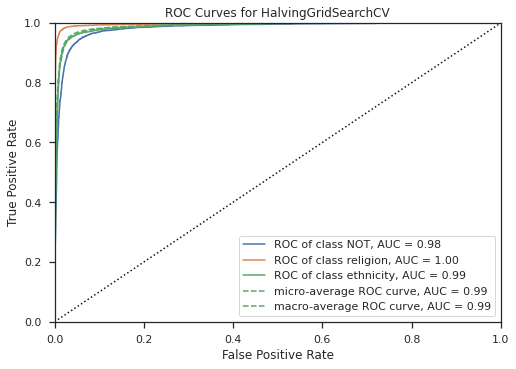

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57a8e7d1d0>,
       classes=['NOT', 'religion', 'ethnicity'],
       estimator=HalvingGridSearchCV(estimator=LinearSVC(), n_jobs=-1,
                                     param_grid={'C': [1e-05, 0.0001, 0.01, 0.1,
                                                       1]}))

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_svm_model, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])

              precision    recall  f1-score   support

         NOT       0.93      0.95      0.94      6147
   ethnicity       0.99      0.98      0.99      6185
    religion       0.96      0.94      0.95      6400

    accuracy                           0.96     18732
   macro avg       0.96      0.96      0.96     18732
weighted avg       0.96      0.96      0.96     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



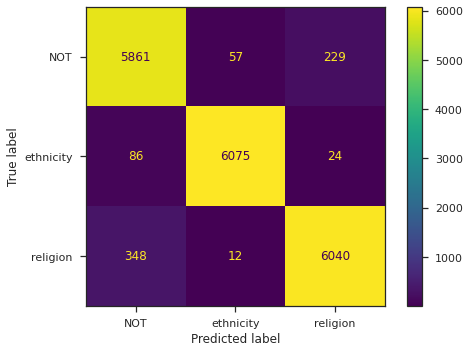

In [ ]:
# RANDOM FORESTS
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
n_estimators = [64, 100, 128]
bootstrap = [True, False] # Bootstrapping is true by default
param_grid = {'n_estimators': n_estimators, 'bootstrap': bootstrap}
grid_rf_model = HalvingGridSearchCV(rf_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_rf_model.fit(X_train_tfidf, y_train)
preds_grid_rf_model = grid_rf_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_rf_model))
plot_confusion_matrix(grid_rf_model, X_test_tfidf, y_test)

In [ ]:
grid_rf_model.best_estimator_

RandomForestClassifier(bootstrap=False)

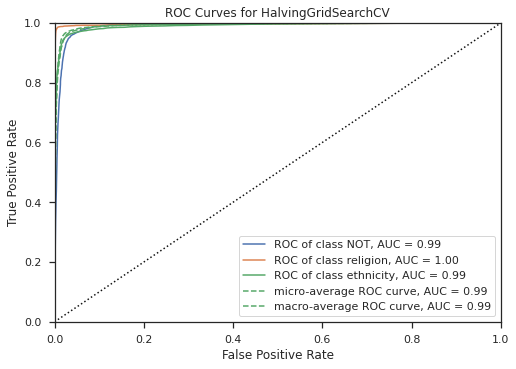

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57a52d6f50>,
       classes=['NOT', 'religion', 'ethnicity'],
       estimator=HalvingGridSearchCV(estimator=RandomForestClassifier(),
                                     n_jobs=-1,
                                     param_grid={'bootstrap': [True, False],
                                                 'n_estimators': [64, 100,
                                                                  128]}))

In [ ]:
roc_auc(grid_rf_model, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])

              precision    recall  f1-score   support

         NOT       0.95      0.61      0.74      6147
   ethnicity       0.81      0.96      0.88      6185
    religion       0.83      0.97      0.89      6400

    accuracy                           0.85     18732
   macro avg       0.86      0.85      0.84     18732
weighted avg       0.86      0.85      0.84     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



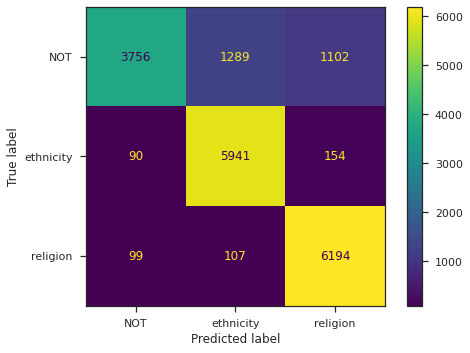

In [ ]:
# NAIVE - BAYES
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
preds_nb_model = nb_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_nb_model))
plot_confusion_matrix(nb_model, X_test_tfidf, y_test)

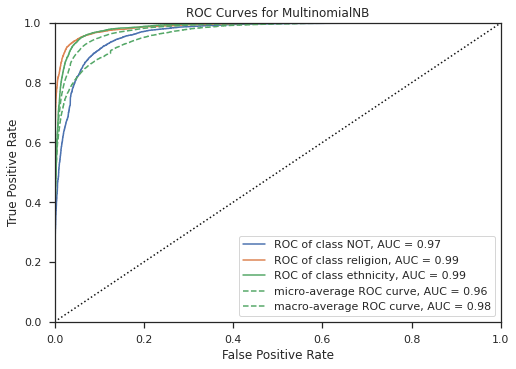

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57aa03bd10>,
       classes=['NOT', 'religion', 'ethnicity'], estimator=MultinomialNB())

In [ ]:
roc_auc(nb_model, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])

              precision    recall  f1-score   support

         NOT       0.90      0.97      0.93      6147
   ethnicity       0.99      0.98      0.99      6185
    religion       0.97      0.91      0.94      6400

    accuracy                           0.95     18732
   macro avg       0.95      0.95      0.95     18732
weighted avg       0.95      0.95      0.95     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



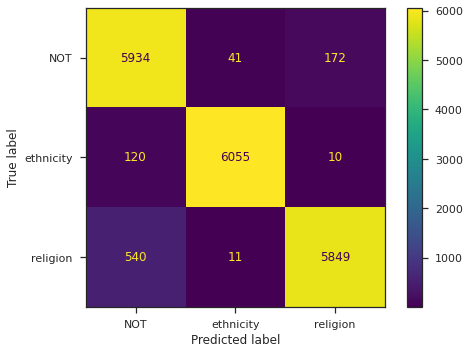

In [ ]:
# GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
grad_model = GradientBoostingClassifier(random_state = 42)
param_grid = {'n_estimators': [64, 100, 128, 200]}
grid_grad_model = HalvingGridSearchCV(grad_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_grad_model.fit(X_train_tfidf, y_train)
preds_grid_grad_model = grid_grad_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_grad_model))
plot_confusion_matrix(grid_grad_model, X_test_tfidf, y_test)

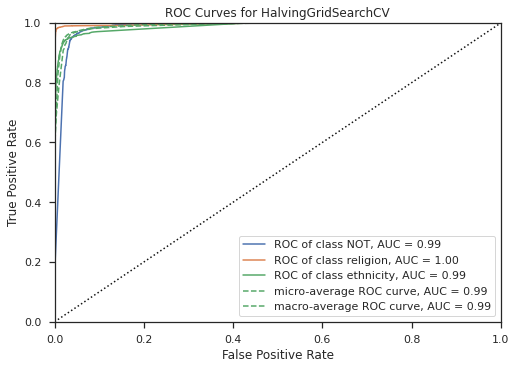

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57aa02c310>,
       classes=['NOT', 'religion', 'ethnicity'],
       estimator=HalvingGridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                                     n_jobs=-1,
                                     param_grid={'n_estimators': [64, 100, 128,
                                                                  200]}))

In [ ]:
roc_auc(grid_grad_model, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1560
max_resources_: 4682
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 1560
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 1
n_candidates: 1
n_resources: 4680
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

         NOT       0.90      0.96      0.93      6147
   ethnicity       0.99      0.98      0.99      6185
    religion       0.97      0.92      0.94      6400

    accuracy                           0.95     18732
   macro avg       0.95      0.95      0.95     18732
weighted avg       0.95      0.95      0.95     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



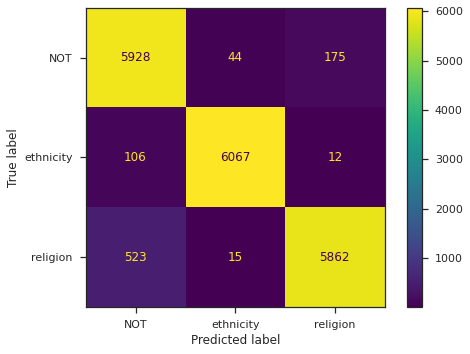

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

param_grid = dict(
    n_estimators= [100, 500, 1000]
)
grid_xgb_model = HalvingGridSearchCV(xgb_clf, param_grid=param_grid, n_jobs=-1, verbose=1)
grid_xgb_model.fit(X_train_tfidf, y_train)
preds_grid_xgb_model = grid_xgb_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_xgb_model))
plot_confusion_matrix(grid_xgb_model, X_test_tfidf, y_test)

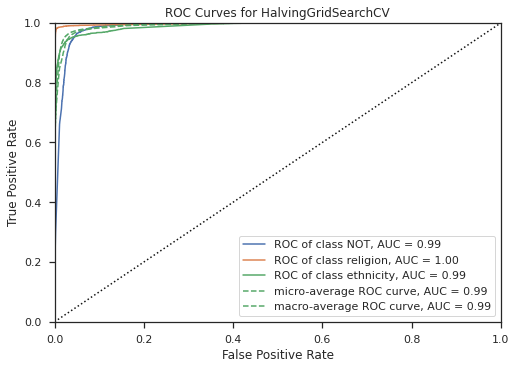

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57a8ca2750>,
       classes=['NOT', 'religion', 'ethnicity'],
       estimator=HalvingGridSearchCV(estimator=XGBClassifier(), n_jobs=-1,
                                     param_grid={'n_estimators': [100, 500,
                                                                  1000]},
                                     verbose=1))

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_xgb_model, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])

              precision    recall  f1-score   support

         NOT       0.80      0.97      0.88      6147
   ethnicity       0.99      0.96      0.97      6185
    religion       0.96      0.80      0.87      6400

    accuracy                           0.91     18732
   macro avg       0.92      0.91      0.91     18732
weighted avg       0.92      0.91      0.91     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



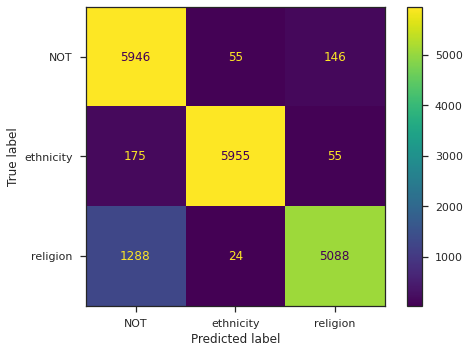

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators=128, learning_rate=0.5, random_state=42)
adaboost_model.fit(X_train_tfidf, y_train)
preds_grid_adaboost_model = adaboost_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_adaboost_model))
plot_confusion_matrix(adaboost_model, X_test_tfidf, y_test)

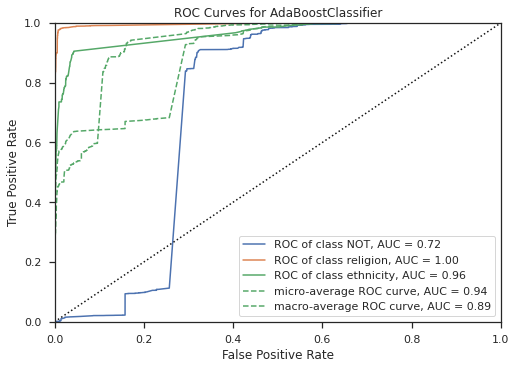

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57a9d43bd0>,
       classes=['NOT', 'religion', 'ethnicity'],
       estimator=AdaBoostClassifier(learning_rate=0.5, n_estimators=128,
                                    random_state=42))

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(adaboost_model, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])

# **Bag of Words: N-grams with Count Vectorizer**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.8, random_state = 42)

In [ ]:
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2)).fit(X_train)

X_train_cvec = vectorizer.transform(X_train)
X_test_cvec = vectorizer.transform(X_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



              precision    recall  f1-score   support

         NOT       0.87      0.95      0.91      6147
   ethnicity       0.98      0.92      0.95      6185
    religion       0.96      0.93      0.95      6400

    accuracy                           0.94     18732
   macro avg       0.94      0.94      0.94     18732
weighted avg       0.94      0.94      0.94     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



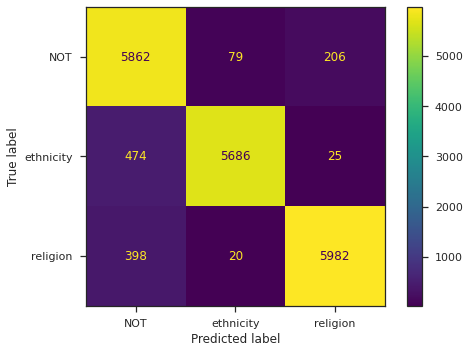

In [ ]:
# LOGISTIC REGRESSION 

log_model = LogisticRegression(solver = 'saga')
param_grid = {'C': np.logspace(0, 10, 5)}
grid_log_model = HalvingGridSearchCV(log_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_log_model.fit(X_train_cvec, y_train)
preds_grid_log_model = grid_log_model.predict(X_test_cvec)
print(classification_report(y_test, preds_grid_log_model))
plot_confusion_matrix(grid_log_model, X_test_cvec, y_test)

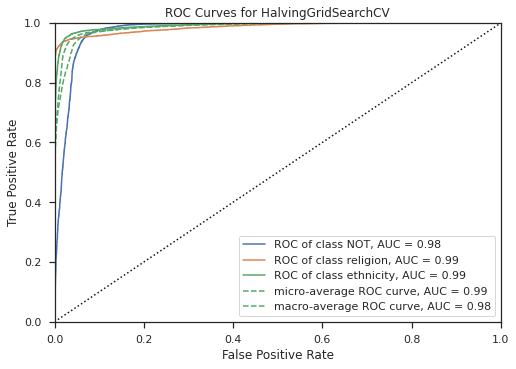

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57a8c75f50>,
       classes=['NOT', 'religion', 'ethnicity'],
       estimator=HalvingGridSearchCV(estimator=LogisticRegression(solver='saga'),
                                     n_jobs=-1,
                                     param_grid={'C': array([1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10])}))

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_log_model, X_train_cvec, y_train, X_test=X_test_cvec, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])

              precision    recall  f1-score   support

         NOT       0.86      0.97      0.91      6147
   ethnicity       0.99      0.92      0.95      6185
    religion       0.97      0.92      0.94      6400

    accuracy                           0.93     18732
   macro avg       0.94      0.93      0.93     18732
weighted avg       0.94      0.93      0.93     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



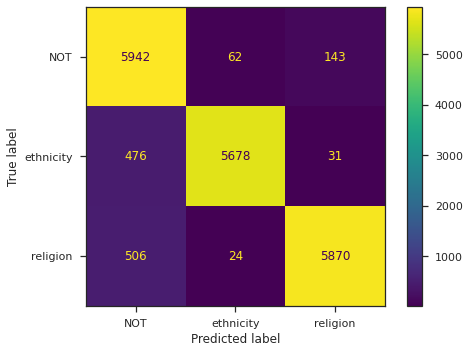

In [ ]:
# SUPPORT VECTOR MACHINES

from sklearn.svm import LinearSVC
svm_model = LinearSVC()
C = [1e-5, 1e-4, 1e-2, 1e-1, 1]
param_grid = {'C': C}
grid_svm_model = HalvingGridSearchCV(svm_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_svm_model.fit(X_train_cvec, y_train)
preds_grid_svm_model = grid_svm_model.predict(X_test_cvec)
print(classification_report(y_test, preds_grid_svm_model))
plot_confusion_matrix(grid_svm_model, X_test_cvec, y_test)

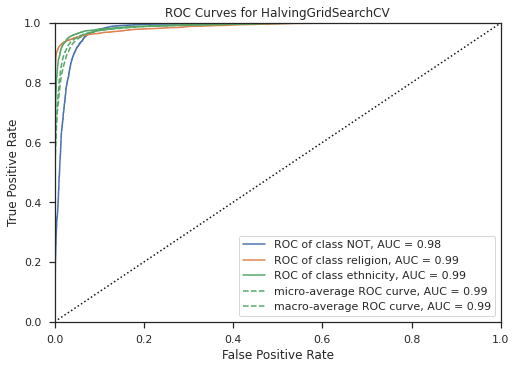

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57a40229d0>,
       classes=['NOT', 'religion', 'ethnicity'],
       estimator=HalvingGridSearchCV(estimator=LinearSVC(), n_jobs=-1,
                                     param_grid={'C': [1e-05, 0.0001, 0.01, 0.1,
                                                       1]}))

In [ ]:
roc_auc(grid_svm_model, X_train_cvec, y_train, X_test=X_test_cvec, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])

              precision    recall  f1-score   support

         NOT       0.86      0.95      0.90      6147
   ethnicity       0.97      0.92      0.94      6185
    religion       0.96      0.93      0.94      6400

    accuracy                           0.93     18732
   macro avg       0.93      0.93      0.93     18732
weighted avg       0.93      0.93      0.93     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



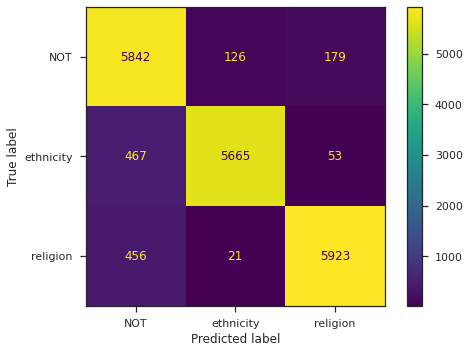

In [ ]:
# RANDOM FORESTS
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
n_estimators = [64, 100, 128]
bootstrap = [True, False] # Bootstrapping is true by default
param_grid = {'n_estimators': n_estimators, 'bootstrap': bootstrap}
grid_rf_model = HalvingGridSearchCV(rf_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_rf_model.fit(X_train_cvec, y_train)
preds_grid_rf_model = grid_rf_model.predict(X_test_cvec)
print(classification_report(y_test, preds_grid_rf_model))
plot_confusion_matrix(grid_rf_model, X_test_cvec, y_test)

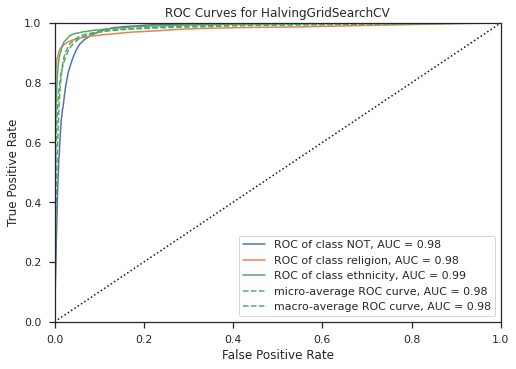

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57a40665d0>,
       classes=['NOT', 'religion', 'ethnicity'],
       estimator=HalvingGridSearchCV(estimator=RandomForestClassifier(),
                                     n_jobs=-1,
                                     param_grid={'bootstrap': [True, False],
                                                 'n_estimators': [64, 100,
                                                                  128]}))

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_rf_model, X_train_cvec, y_train, X_test=X_test_cvec, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])

In [ ]:
import xgboost as xgb

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1560
max_resources_: 4682
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 1560
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 1
n_candidates: 1
n_resources: 4680
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

         NOT       0.88      0.95      0.91      6147
   ethnicity       0.98      0.93      0.95      6185
    religion       0.96      0.93      0.95      6400

    accuracy                           0.94     18732
   macro avg       0.94      0.94      0.94     18732
weighted avg       0.94      0.94      0.94     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



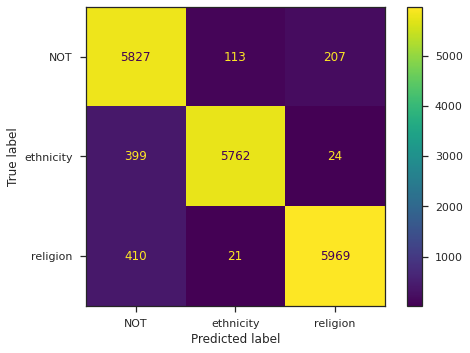

In [ ]:
xgb_clf = xgb.XGBClassifier()

param_grid = dict(
    n_estimators= [100, 500, 1000]
)
grid_xgb_model = HalvingGridSearchCV(xgb_clf, param_grid=param_grid, n_jobs=-1, verbose=1)
grid_xgb_model.fit(X_train_cvec, y_train)
preds_grid_xgb_model = grid_xgb_model.predict(X_test_cvec)
print(classification_report(y_test, preds_grid_xgb_model))
plot_confusion_matrix(grid_xgb_model, X_test_cvec, y_test)

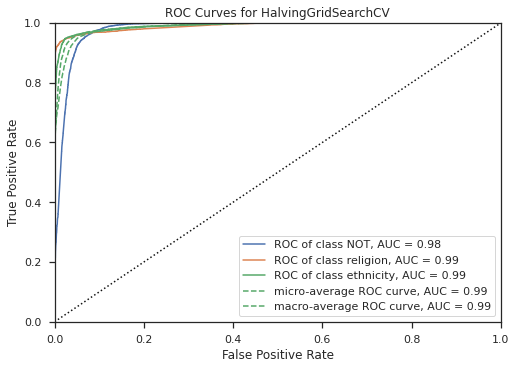

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57a4f23d10>,
       classes=['NOT', 'religion', 'ethnicity'],
       estimator=HalvingGridSearchCV(estimator=XGBClassifier(), n_jobs=-1,
                                     param_grid={'n_estimators': [100, 500,
                                                                  1000]},
                                     verbose=1))

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_xgb_model, X_train_cvec, y_train, X_test=X_test_cvec, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])

              precision    recall  f1-score   support

         NOT       0.96      0.51      0.66      6147
   ethnicity       0.80      0.95      0.87      6185
    religion       0.77      0.98      0.87      6400

    accuracy                           0.82     18732
   macro avg       0.84      0.81      0.80     18732
weighted avg       0.84      0.82      0.80     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



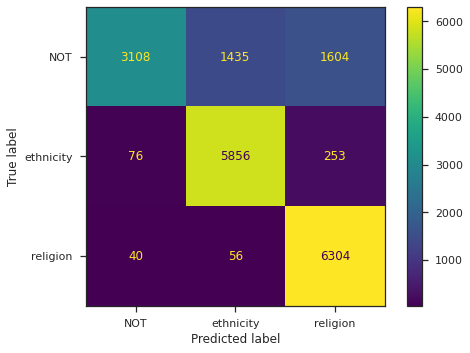

In [ ]:
# NAIVE - BAYES
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_cvec, y_train)
preds_nb_model = nb_model.predict(X_test_cvec)
print(classification_report(y_test, preds_nb_model))
plot_confusion_matrix(nb_model, X_test_cvec, y_test)

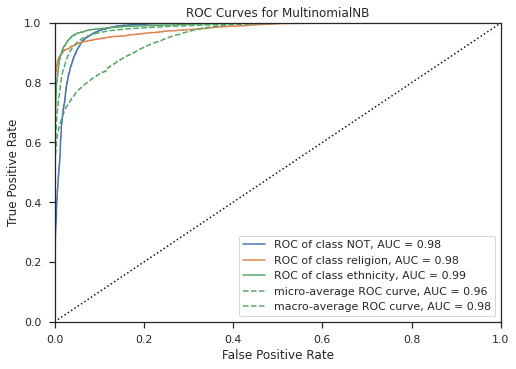

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57a4e7da50>,
       classes=['NOT', 'religion', 'ethnicity'], estimator=MultinomialNB())

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(nb_model, X_train_cvec, y_train, X_test=X_test_cvec, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

              precision    recall  f1-score   support

         NOT       0.85      0.86      0.85      6147
   ethnicity       0.97      0.91      0.94      6185
    religion       0.88      0.92      0.90      6400

    accuracy                           0.90     18732
   macro avg       0.90      0.90      0.90     18732
weighted avg       0.90      0.90      0.90     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



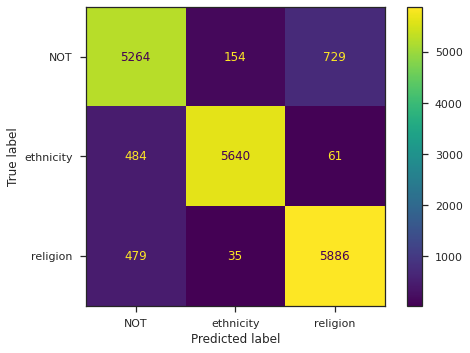

In [ ]:
adaboost_model = AdaBoostClassifier(n_estimators=600, learning_rate=1.5, random_state=42)
adaboost_model.fit(X_train_cvec, y_train)
preds_grid_adaboost_model = adaboost_model.predict(X_test_cvec)
print(classification_report(y_test, preds_grid_adaboost_model))
plot_confusion_matrix(adaboost_model, X_test_cvec, y_test)

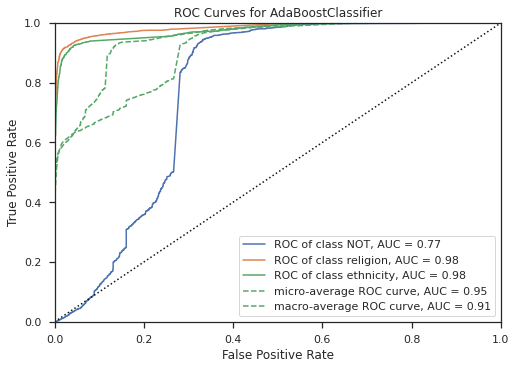

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57a8b5a210>,
       classes=['NOT', 'religion', 'ethnicity'],
       estimator=AdaBoostClassifier(learning_rate=1.5, n_estimators=600,
                                    random_state=42))

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(adaboost_model, X_train_cvec, y_train, X_test=X_test_cvec, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])

              precision    recall  f1-score   support

         NOT       0.80      0.97      0.88      6147
   ethnicity       0.99      0.91      0.95      6185
    religion       0.96      0.85      0.90      6400

    accuracy                           0.91     18732
   macro avg       0.92      0.91      0.91     18732
weighted avg       0.92      0.91      0.91     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



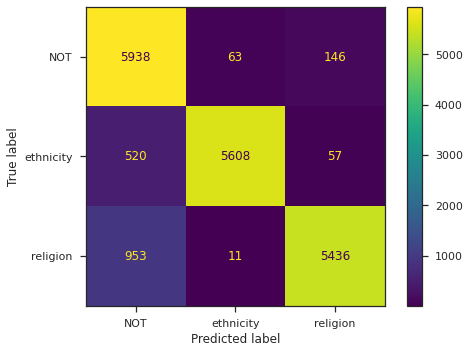

In [ ]:
adaboost_model = AdaBoostClassifier(n_estimators=128, learning_rate=0.5, random_state=42)
adaboost_model.fit(X_train_cvec, y_train)
preds_grid_adaboost_model = adaboost_model.predict(X_test_cvec)
print(classification_report(y_test, preds_grid_adaboost_model))
plot_confusion_matrix(adaboost_model, X_test_cvec, y_test)

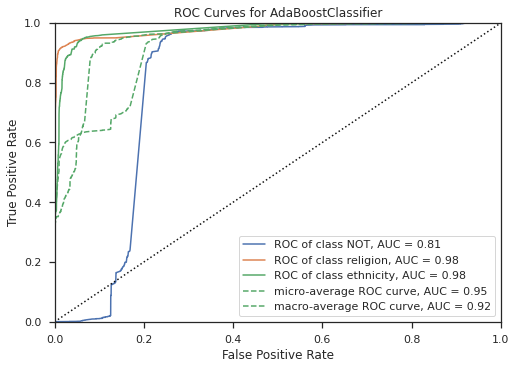

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57a4de73d0>,
       classes=['NOT', 'religion', 'ethnicity'],
       estimator=AdaBoostClassifier(learning_rate=0.5, n_estimators=128,
                                    random_state=42))

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(adaboost_model, X_train_cvec, y_train, X_test=X_test_cvec, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])

              precision    recall  f1-score   support

         NOT       0.85      0.97      0.90      6147
   ethnicity       0.99      0.91      0.95      6185
    religion       0.97      0.91      0.94      6400

    accuracy                           0.93     18732
   macro avg       0.94      0.93      0.93     18732
weighted avg       0.94      0.93      0.93     18732



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



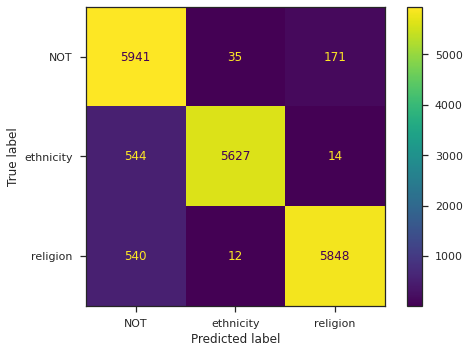

In [ ]:
# GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
grad_model = GradientBoostingClassifier(random_state = 42)
param_grid = {'n_estimators': [64, 100, 128, 200]}
grid_grad_model = HalvingGridSearchCV(grad_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_grad_model.fit(X_train_cvec, y_train)
preds_grid_grad_model = grid_grad_model.predict(X_test_cvec)
print(classification_report(y_test, preds_grid_grad_model))
plot_confusion_matrix(grid_grad_model, X_test_cvec, y_test)

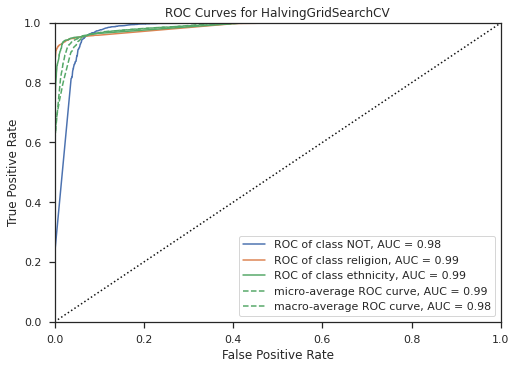

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f57a4dac990>,
       classes=['NOT', 'religion', 'ethnicity'],
       estimator=HalvingGridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                                     n_jobs=-1,
                                     param_grid={'n_estimators': [64, 100, 128,
                                                                  200]}))

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_grad_model, X_train_cvec, y_train, X_test=X_test_cvec, y_test=y_test, classes=['NOT', 'religion', 'ethnicity'])